## 5.4 Graded Response Model

The **Graded Response Model** (GRM; Samejima, 1969) is another widely used polytomous IRT model that, like the GPCM, includes **item-specific discrimination parameters** ($\\alpha_i$). However, the models differ in how they define response probabilities:

- The **GRM** estimates the probability of responding in **category $h$ or higher** (cumulative).
- The **GPCM** estimates the probability of responding in **category $h$ exactly** (nominal).

In the GRM, each threshold $\beta_{ih}$ represents the **boundary** on the latent trait where the probability of responding in category $h$ or higher is 0.5. As with the PCM and GPCM, items can have different numbers of categories.

The GRM can be estimated using the `ltm` package via the `grm()` function.

## The Dataset

To illustrate the GRM, we use the **self-transcendence (ST)** subscale from the ASTI dataset—previously used in the GPCM analysis. This subscale includes seven polytomous items appropriate for graded modeling.

## Load data Fit the model

In [ ]:
# Imports
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.packages import importr
from jupyterquiz import display_quiz

# Miscellaneous
pandas2ri.activate()
numpy2ri.activate()
ro.r('set.seed(123)')
%load_ext rpy2.ipython

# R imports
importr('mirt')     
importr('MPsychoR')
importr('eRm')
importr('ltm')
print("\n\n" + "Python & R packages imported successfully.")

# Load data
ro.r("data(ASTI)")
ASTI = pandas2ri.rpy2py(ro.globalenv['ASTI'])
STitems = ASTI.iloc[:, [1,3,7,12,15,23,24]]
ro.globalenv['STitems'] = STitems

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Python & R packages imported successfully.


In [3]:
# Fit the model
ro.r('fitgrm <- grm(STitems)')

# Estimate person parameter
ro.r('ppargrm <- ltm::factor.scores(fitgrm)')

## OCCs and ICCs

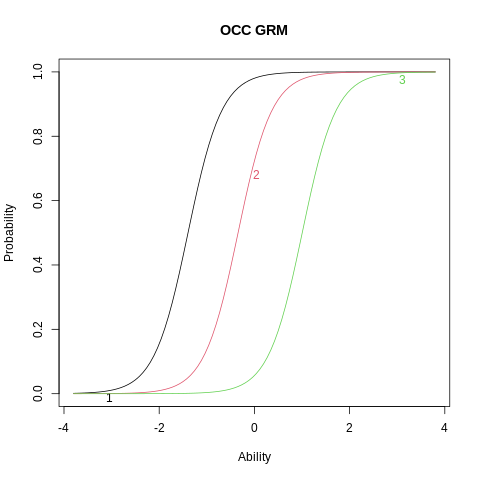

In [ ]:
%%R
plot(fitgrm, type="OCCu", items = 1, main = "OCC GRM")

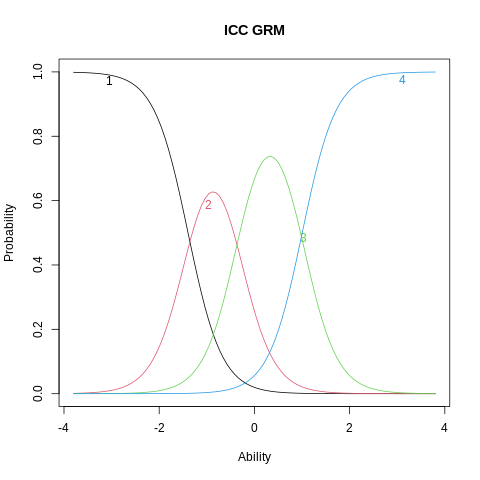

In [ ]:
%%R
plot(fitgrm, type = "ICC", items = 1, main = "ICC GRM")

The **upper panel** displays the **Operating Characteristic Curves (OCCs)** for a selected item. Each curve represents the probability of scoring at or above a given category threshold:

- The first curve shows the probability of scoring **1 or higher**,
- The second, **2 or higher**,
- The third, **3 or higher**, and so on.

These curves are cumulative and naturally **monotonically decreasing**, reflecting the increasing difficulty of meeting higher category thresholds.

The **lower panel** shows the **Item Category Characteristic Curves (ICCs)**, generated with:

```r
plot(fitgrm, type = "ICC")
```

Each curve here reflects the probability of selecting a specific category—analogous to ICCs in the GPCM. Unlike OCCs, these curves are not cumulative and allow clearer comparisons between individual category probabilities across the trait continuum.

### Test your understanding

In [5]:
display_quiz("quiz/quiz_grm.json")

<IPython.core.display.Javascript object>